EE5593 - Code for Problem 1 (a)

In [1]:
import numpy as np

# Stoichiometric changes [dx1, dx2, dx3] per reaction
delta = [
    [-2, -1, +4],   # R1: 2X1 + X2 -> 4X3, k1=1
    [-1, +3, -2],   # R2: X1 + 2X3 -> 3X2, k2=2
    [+2, -1, -1],   # R3: X2 + X3  -> 2X1, k3=3
]

def propensities(x):
    x1, x2, x3 = x
    a1 = 0.5 * x1 * (x1 - 1) * x2   if x1 >= 2 and x2 >= 1 else 0.0
    a2 = x1 * x3 * (x3 - 1)          if x1 >= 1 and x3 >= 2 else 0.0
    a3 = 3.0 * x2 * x3               if x2 >= 1 and x3 >= 1 else 0.0
    return [a1, a2, a3]

def run_trial(S0, rng, max_steps=100_000):
    x = list(S0)
    for _ in range(max_steps):
        a = propensities(x)
        a_total = sum(a)
        if a_total == 0:
            break
        u = rng.random()
        cumulative = 0.0
        chosen = 2
        for r in range(3):
            cumulative += a[r] / a_total
            if u < cumulative:
                chosen = r
                break
        x = [x[i] + delta[chosen][i] for i in range(3)]
        if x[0] >= 150: return 1  # C1
        if x[1] < 10:   return 2  # C2
        if x[2] > 100:  return 3  # C3
    return 0

# Run simulation
N = 50_000
S0 = [110, 26, 55]
rng = np.random.default_rng(seed=42)
counts = {0: 0, 1: 0, 2: 0, 3: 0}

for i in range(N):
    counts[run_trial(S0, rng)] += 1
    if (i + 1) % 10_000 == 0:
        print(f"  {i+1}/{N} complete")

print(f"\nPr(C1) = {counts[1]/N:.6f}")
print(f"Pr(C2) = {counts[2]/N:.6f}")
print(f"Pr(C3) = {counts[3]/N:.6f}")

  10000/50000 complete
  20000/50000 complete
  30000/50000 complete
  40000/50000 complete
  50000/50000 complete

Pr(C1) = 0.000000
Pr(C2) = 0.000000
Pr(C3) = 1.000000


Code for problem 1(b)

X1:  Mean = 5.8367,  Variance = 5.8728
X2:  Mean = 12.5060,  Variance = 8.9128
X3:  Mean = 7.7908,  Variance = 8.8758


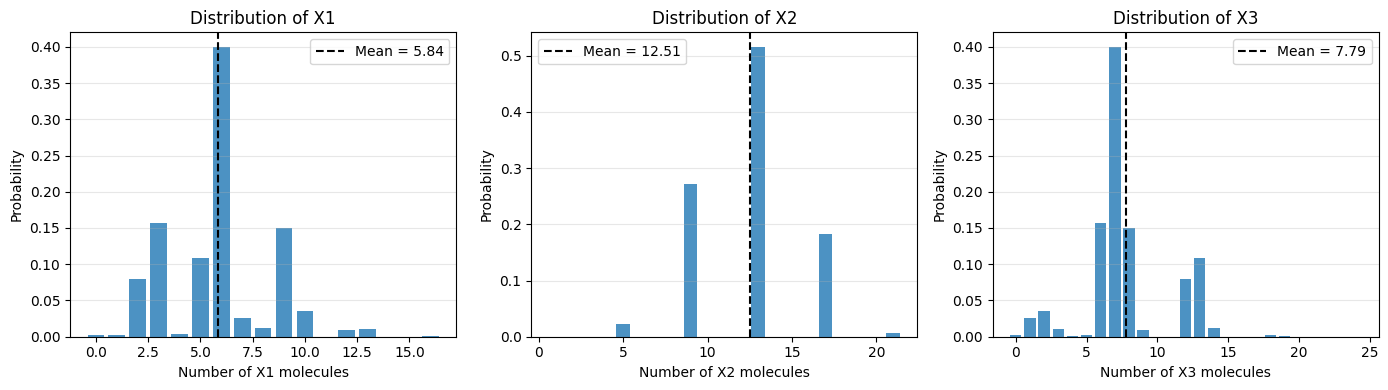

In [2]:
import numpy as np
import matplotlib.pyplot as plt

delta = [
    [-2, -1, +4],   # R1
    [-1, +3, -2],   # R2
    [+2, -1, -1],   # R3
]

def run_sim_7steps(S0, rng):
    x = list(S0)
    for _ in range(7):
        x1, x2, x3 = x
        a1 = 0.5 * x1 * (x1 - 1) * x2   if x1 >= 2 and x2 >= 1 else 0.0
        a2 = x1 * x3 * (x3 - 1)          if x1 >= 1 and x3 >= 2 else 0.0
        a3 = 3.0 * x2 * x3               if x2 >= 1 and x3 >= 1 else 0.0
        a_total = a1 + a2 + a3
        if a_total == 0:
            break
        u = rng.random()
        if u < a1 / a_total:               r = 0
        elif u < (a1 + a2) / a_total:     r = 1
        else:                              r = 2
        x = [x[i] + delta[r][i] for i in range(3)]
    return x

# Run simulation
N = 200_000
rng = np.random.default_rng(seed=42)
x1s, x2s, x3s = [], [], []

for _ in range(N):
    result = run_sim_7steps([9, 8, 7], rng)
    x1s.append(result[0])
    x2s.append(result[1])
    x3s.append(result[2])

x1s = np.array(x1s)
x2s = np.array(x2s)
x3s = np.array(x3s)

# Summary statistics
print(f"X1:  Mean = {np.mean(x1s):.4f},  Variance = {np.var(x1s):.4f}")
print(f"X2:  Mean = {np.mean(x2s):.4f},  Variance = {np.var(x2s):.4f}")
print(f"X3:  Mean = {np.mean(x3s):.4f},  Variance = {np.var(x3s):.4f}")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, data, label in zip(axes, [x1s, x2s, x3s], ['X1', 'X2', 'X3']):
    vals, cnts = np.unique(data, return_counts=True)
    ax.bar(vals, cnts / N, alpha=0.8)
    ax.axvline(np.mean(data), color='black', linestyle='--', label=f'Mean = {np.mean(data):.2f}')
    ax.set_title(f'Distribution of {label}')
    ax.set_xlabel(f'Number of {label} molecules')
    ax.set_ylabel('Probability')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

#plt.tight_layout()
#plt.show()